# Problem Statement

### Use regression analysis to predict the price of car

# Attribute Information

# Import Required libraries

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

# To enable plotting graphs in Jupiter notebook
%matplotlib inline

# Load and explore data

In [2]:
os.chdir("F:/Python/Datasets/Pandas")

In [3]:
df_usedcars=pd.read_csv('used_cars_data.csv')
print(df_usedcars)

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [4]:
df1=df_usedcars.copy()

In [5]:
df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df1.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
df1.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
df1.shape

(7253, 14)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# Observations

* There are 7353 rows and 14 columns
* Dependant variable is  price
* There are 5 numeric variable and 9 catagorical variables, some of numeric variables are in object type so we have to convert it.
* There are null values present in data which we have to fix

# Let us look at the missing values

In [10]:
df1.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [11]:
missing=df1.columns[df1.isnull().any()]
df1[missing].isnull().sum()

Mileage         2
Engine         46
Power          46
Seats          53
New_Price    6247
Price        1234
dtype: int64

In [12]:
# Find missing data percentage
#percent_missing = df. isnull(). sum() * 100 / len(df)
percentage_missing=df1[missing].isnull().sum()*100/len(df1)
percentage_missing

Mileage       0.027575
Engine        0.634220
Power         0.634220
Seats         0.730732
New_Price    86.129877
Price        17.013650
dtype: float64

In [13]:
# Drop columns having more than 40 % missing data
# New price column contain 86% missing values hence drop it.
df1.drop(['New_Price'], axis = 1,inplace=True)

# Let us fix missing values

In [14]:
#Extract the Brand and Model column from Name column
df1["Brand"]=df1['Name'].str.split(expand=True)[0]
df1["Model"]=df1['Name'].str.split(expand=True)[1]

In [15]:
#Split the Values and Unit from Mileage,Engine,Power column
df1["Mileage_value"]=df1['Mileage'].str.split(expand=True)[0]
df1["Engine_value"]=df1['Engine'].str.split(expand=True)[0]
df1["Power_value"]=df1['Power'].str.split(expand=True)[0]

In [16]:
df1['Mileage_value'].dtype

dtype('O')

In [17]:
# Covert data type from string to float
df1['Mileage_value']=df1['Mileage_value'].astype(float)
df1['Engine_value']=df1['Engine_value'].astype(float)


In [18]:
df1['Power_value'].value_counts()

74        280
98.6      166
73.9      152
140       142
null      129
         ... 
270.88      1
201         1
503         1
181.43      1
74.93       1
Name: Power_value, Length: 386, dtype: int64

In [19]:
# Power value column contain null value so replace it by np.nan
df1['Power_value'].replace('null',np.nan,inplace=True)

In [20]:
df1['Power_value']=df1['Power_value'].astype(float)  # Covert data type from string to float

###### Lets fill missing values of mileage, engine and power value by median and groupby 


In [21]:
# Mileage_value
df1['Mileage_value'].min()

0.0

In [22]:
df1['Mileage_value'].max()

33.54

In [23]:
df1['Mileage_value'].replace(0,np.nan,inplace=True)

In [24]:
df1['Mileage_value'].isnull().sum()

83

In [25]:
df1['Mileage_value'].median()

18.2

In [26]:
df1['Mileage_value'].fillna(18.2, inplace=True)

In [27]:
df1['Mileage_value'].isnull().sum()

0

In [28]:
# Engine_value
df1['Engine_value'].min()

72.0

In [29]:
df1["Engine_value"]=df1.groupby(['Brand', 'Model'])['Engine_value'].transform(lambda x : x.fillna(x.median()))

In [30]:
df1['Engine_value'].isnull().sum()

0

In [31]:
# Power_value
df1['Power_value'].min()

34.2

In [32]:
# Fill null values by groupby 'Brand' and 'model' and median of Power_value
df1["Power_value"]=df1.groupby(['Brand', 'Model'])['Power_value'].transform(lambda x : x.fillna(x.median()))

In [33]:
df1['Power_value'].isnull().sum()

12

In [34]:
# Again apply same to remove null values by groupby 'Brand'  and median of Power_value
df1["Power_value"]=df1.groupby(['Brand'])['Power_value'].transform(lambda x : x.fillna(x.median()))

In [35]:
df1['Power_value'].isnull().sum()

2

In [36]:
df1['Power_value'].median()

92.7

In [37]:
df1["Power_value"].fillna(92.7,inplace=True)

In [38]:
df1['Power_value'].isnull().sum()

0

In [39]:
## Lets fix null values of seats
df1["Seats"].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [40]:
df1['Seats'].median()

5.0

In [41]:
# Lets replace 0 and null values by median-5
df1["Seats"].fillna(5, inplace = True)

In [42]:
df1['Seats'].replace(0,5,inplace=True)

In [43]:
df1['Seats'].isnull().sum()

0

In [44]:
## Lets fix null values for Price
df1['Price'].isnull().sum()

1234

In [45]:
df1['Price'].min()

0.44

In [46]:
# Fill null values by groupby 'Brand' and 'model' and median of Price
df1["Price"]=df1.groupby(['Brand', 'Model'])['Price'].transform(lambda x : x.fillna(x.median()))

In [47]:
df1['Price'].isnull().sum()

7

In [48]:
df1["Price"].median()

5.59

In [49]:
# Fill remaing null values by median of price column
df1["Price"].fillna(5.59,inplace=True)

In [50]:
df1['Price'].isnull().sum()

0

###### Check for max value of Kilometer driven
###### The Maxmimun reading on odometer must be up to 1,10,000. Therefore, replace those readings which have more than 1,10,000 with median 

In [51]:
df1['Kilometers_Driven'].max()

6500000

In [52]:
# So we have to replace kilometer driven values exceeding 1,10,000 km by median of column
df1['Kilometers_Driven'].median()

53416.0

In [53]:
# Replace Value
df1['Kilometers_Driven']=np.where((df1['Kilometers_Driven']>=109999.99),53416,df1['Kilometers_Driven'])

In [54]:
# check max value
df1['Kilometers_Driven'].max()

109703

In [55]:
df1.isna().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               46
Power                46
Seats                 0
Price                 0
Brand                 0
Model                 0
Mileage_value         0
Engine_value          0
Power_value           0
dtype: int64

In [56]:
# Lets drop Name, Mileage, Engine and POwer column
df1.drop(['Mileage','Engine','Power','Name'],axis=1,inplace=True)

In [57]:
df1.isna().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
Mileage_value        0
Engine_value         0
Power_value          0
dtype: int64

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Seats              7253 non-null   float64
 8   Price              7253 non-null   float64
 9   Brand              7253 non-null   object 
 10  Model              7253 non-null   object 
 11  Mileage_value      7253 non-null   float64
 12  Engine_value       7253 non-null   float64
 13  Power_value        7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


# Lets look at Summary of the data

In [59]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,51293.5,23443,171,34000,53416,67000,109703
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,7253,NaN,NaN,NaN,5.27837,0.806668,2,5,5,5,10
Price,7253,NaN,NaN,NaN,9.31163,10.7514,0.44,3.5,5.59,9.85,160
Brand,7253,33,Maruti,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,51293.529436,23442.970204,171.00,34000.0,53416.00,67000.00,109703.00
Seats,7253.0,5.278368,0.806668,2.00,5.0,5.00,5.00,10.00
Price,7253.0,9.311626,10.751377,0.44,3.5,5.59,9.85,160.00
Mileage_value,7253.0,18.344850,4.134077,6.40,15.4,18.20,21.10,33.54
Engine_value,7253.0,1615.556322,594.317617,72.00,1198.0,1493.00,1968.00,5998.00
Power_value,7253.0,112.181453,53.402579,34.20,74.0,92.70,138.03,616.00


In [61]:
df1.describe(include='object').T

,count,unique,top,freq
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand,7253,33,Maruti,1444
Model,7253,219,Swift,418


# Outlier Treatment

### Outlier detection using boxplot

In [62]:
# Create numeric column list
Numeric_columns=df1.select_dtypes(include=np.number).columns.tolist()
Numeric_columns

['S.No.',
 'Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'Mileage_value',
 'Engine_value',
 'Power_value']

In [63]:
# Create catagorical column list
catagorical_columns=df1.select_dtypes(include=object).columns.tolist()
catagorical_columns

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']

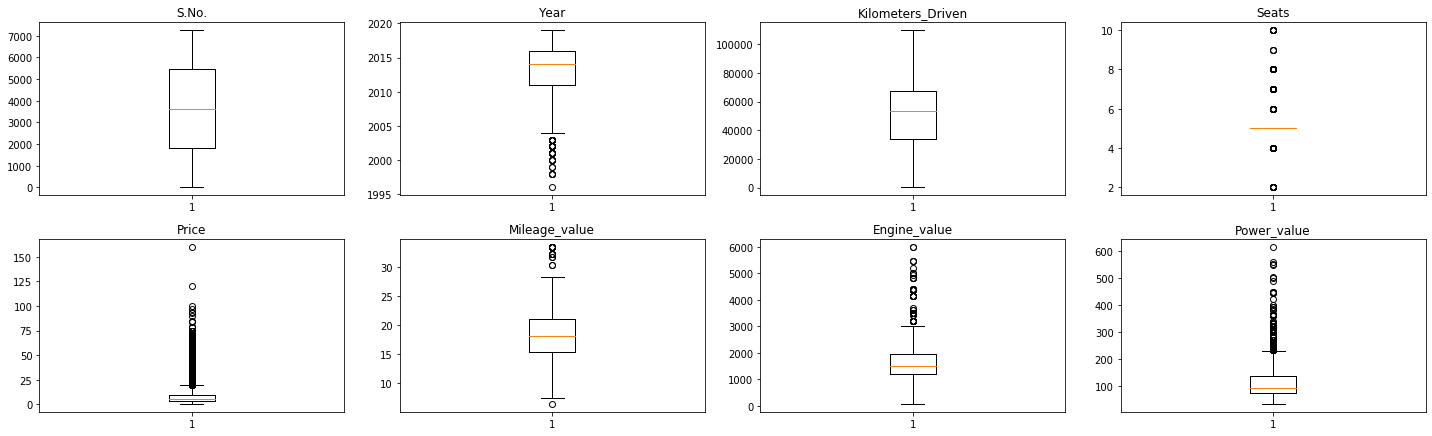

In [64]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns):
                     plt.subplot(10,4,i+1)
                     plt.boxplot(df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [65]:
# Histogram

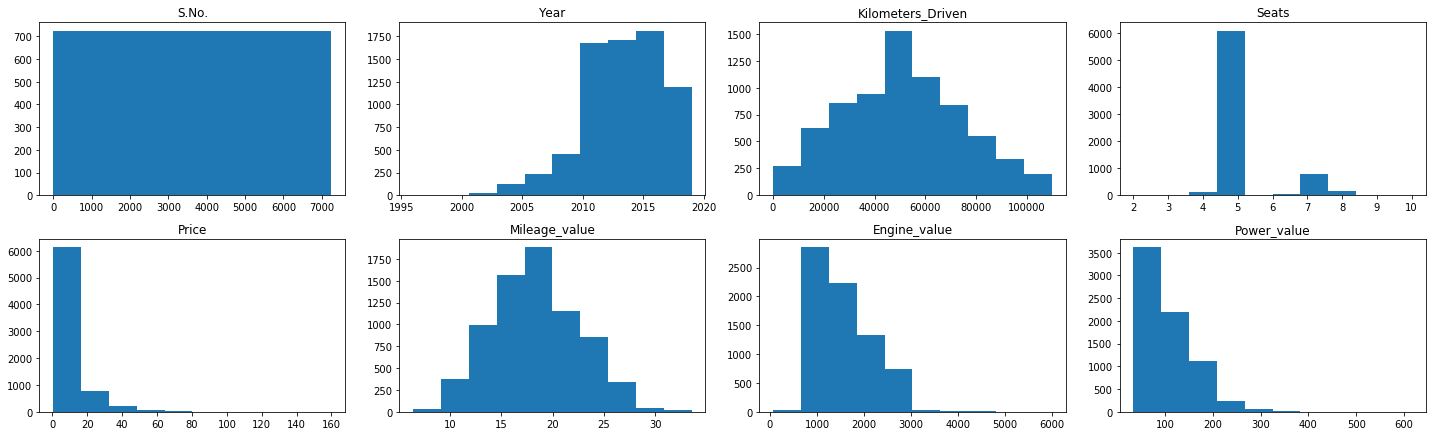

In [66]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns):
                     plt.subplot(10,4,i+1)
                     plt.hist(df1[variable])
                     plt.tight_layout()
                     plt.title(variable)

<p style = "font-size : 20px ; color: black;font-family:TimesNewRoman">
    <b>Observations</b></p>

- As we can see, outliers are present in the data, so lets fix the outliers.
- Year and Seats are the important columns, so we can not remove the outliers from these two columns.

## Caping of outliers from data

In [67]:
Numeric_columns1=['Mileage_value','Engine_value','Power_value']

In [68]:
def LRwhisker(Numeric_columns1):
    q1=df1[Numeric_columns1].quantile(0.25)
    q3=df1[Numeric_columns1].quantile(0.75)
    IQR=q3-q1
    
    Q1 = q1-1.5*IQR
    Q3 = q3+1.5*IQR
    df1[Numeric_columns1]=np.clip(df1[Numeric_columns1],Q1,Q3)

In [69]:
for i in Numeric_columns1:
    LRwhisker(i)

## To check whether outliers are removed or not

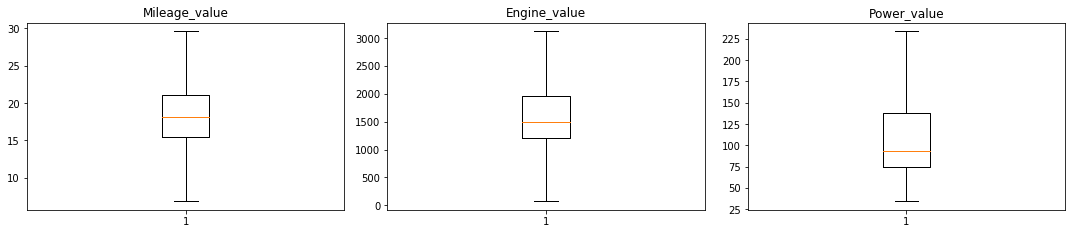

In [70]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns1):
                     plt.subplot(10,4,i+1)
                     plt.boxplot(df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

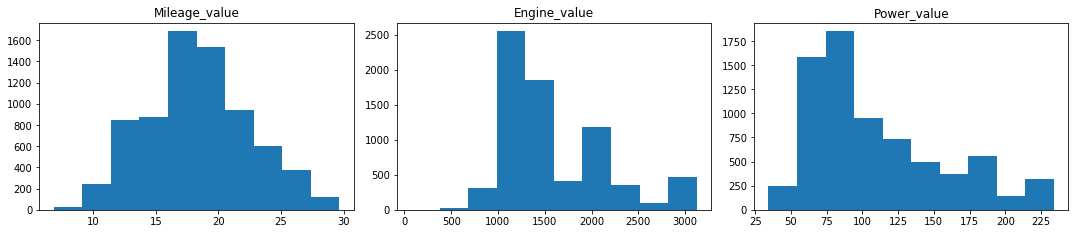

In [71]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(Numeric_columns1):
                     plt.subplot(10,4,i+1)
                     plt.hist(df1[variable])
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

# Model Building

In [72]:
df1.columns

Index(['S.No.', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Brand', 'Model',
       'Mileage_value', 'Engine_value', 'Power_value'],
      dtype='object')

In [73]:
# Defining X and Y variables

x= df1.drop(['Price','S.No.'],axis=1)
y= df1[['Price']]

print(x.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats    Brand   Model  Mileage_value  Engine_value  Power_value  
0    5.0   Maruti   Wagon          26.60         998.0        58.16  
1    5.0  Hyundai   Creta          19.67        1582.0       126.20  
2    5.0    Honda    Jazz          18.20        1199.0        88.70  
3    7.0   Maruti  Ertiga          20.77        1248.0        88.76  
4    5.0     Audi      A4          15.20        1968.0       140.80  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [74]:
print(x.shape)
print(y.shape)

(7253, 12)
(7253, 1)


## Create Dummies

In [75]:
catagorical_columns = x.columns[x.dtypes == 'object']

catagorical_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [76]:

x= pd.get_dummies(x,columns=catagorical_columns,drop_first=True)
x.head()

,Year,Kilometers_Driven,Seats,Mileage_value,Engine_value,Power_value,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,72000,5.0,26.60,998.0,58.16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,19.67,1582.0,126.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,20.77,1248.0,88.76,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,15.20,1968.0,140.80,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Split the data into train and test

In [77]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

### Lets build model using Sklearn

In [78]:
# Fitting linear Model

from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [79]:
print('Intercept of the linear equation:',ln.intercept_)
print('Intercept of the linear equation:',ln.coef_)

Intercept of the linear equation: [-1588.4839556]
Intercept of the linear equation: [[ 7.93156039e-01 -3.23667511e-05  3.13353741e-01 -7.87503836e-02
  -1.49555909e-04  6.56936061e-02  1.57608418e+00  7.81429421e-01
   1.63380074e+00 -2.18049392e-01  1.41177708e+00  6.37166274e-01
  -1.78891232e-01 -8.80375819e-01 -4.74985282e-01  4.09191474e-01
   1.09671163e+00  3.80863841e+00  6.08793706e-01 -4.02640929e-01
  -1.61642757e-01  4.41282803e-01 -3.91033936e-01  4.65460004e-02
   6.61197672e+00 -1.94787464e+00 -7.01480997e+00 -8.04226886e+00
  -8.33627243e+00 -7.15261190e+00 -3.34411628e+00 -6.35163387e+00
   2.91864630e+00 -8.11841761e+00 -4.98578260e+00 -3.76796218e+00
  -7.44856613e+00  2.65388304e+01 -2.11285573e+00  4.96171271e+01
   8.20824774e+00 -8.08906379e+00 -3.78280995e+00  6.01885891e+00
   6.68709769e+00 -5.30533994e+00 -8.59092435e+00 -5.31920983e-01
   2.08974921e+01 -7.65337163e+00 -5.83278094e+00 -2.61493938e-10
  -5.45749538e+00 -4.18123680e+00 -7.57655145e+00 -1.87360

In [80]:
!pip install scikit-learn==0.24

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.metrics import mean_absolute_percentage_error
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)

In [82]:
pred_train

array([[ 8.50574138],
       [ 5.96045528],
       [ 0.16655716],
       ...,
       [ 4.63679606],
       [ 5.20421336],
       [22.52737967]])

In [83]:
pred_test

array([[42.97455572],
       [ 5.76519588],
       [ 1.83499006],
       ...,
       [ 5.07306895],
       [ 6.02080909],
       [ 5.54932245]])

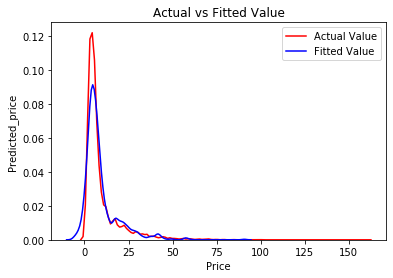

In [84]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df1['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(pred_test, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.legend()
plt.show()

### Lets look at model performances

In [85]:
# Mean absolute error on train and test

print('MAE on train:',mean_absolute_error(y_train,pred_train))
print('MAE on test:',mean_absolute_error(y_test,pred_test))

MAE on train: 2.100887656762055
MAE on test: 2.3858506198206015


In [86]:
# Mean squared error on train and test
print('MSE on train:',mean_squared_error(y_train,pred_train)**0.5)
print('MSE on test:',mean_squared_error(y_test,pred_test)**0.5)

MSE on train: 4.0314779528824065
MSE on test: 4.762445877900908


In [87]:
# R2 Squared on train and test
print('R2 score on train:',r2_score(y_train,pred_train))
print('R2 score on test:',r2_score(y_test,pred_test))

R2 score on train: 0.8556769061029924
R2 score on test: 0.8148297070386596


In [88]:
# MAPE on train and test
print('MAPE on train:',mean_absolute_percentage_error(y_train,pred_train))
print('MAPE on test:',mean_absolute_percentage_error(y_test,pred_test))

MAPE on train: 0.37357454401584644
MAPE on test: 0.41446898784107244


### Lets build model using Statmodel to compare results

In [89]:
x= sm.add_constant(x)
x_train1, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

olsmod0 = sm.OLS(y_train,x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:03:41   Log-Likelihood:                -14510.
No. Observations:                5077   AIC:                         2.948e+04
Df Residuals:                    4845   BIC:                         3.100e+04
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

###### Lets check Multicollinearity of data

In [90]:
# We will use VIF, to check if there is multicollinearity in the data.
# Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5
# Drop the column which has VIF > 5 one by one
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])],index=x_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 0.000000
Year                  2.903643
Kilometers_Driven     1.759935
Seats                16.687275
Mileage_value         7.554965
                       ...    
Model_Zen                  inf
Model_Zest                 inf
Model_i10                  inf
Model_i20                  inf
Model_redi-GO              inf
Length: 275, dtype: float64



In [91]:
vif_series1.sort_values(ascending=False)

Model_redi-GO     inf
Model_Classic     inf
Model_E           inf
Model_Dzire       inf
Model_Duster      inf
                 ... 
Model_Hexa        NaN
Model_Logan       NaN
Model_Motors      NaN
Model_Platinum    NaN
Model_Tavera      NaN
Length: 275, dtype: float64

###### Removing columns which has VIF value > 5

In [92]:
# Creating formula for removing columns which has VIF value > 5

def calculate_vif_(X,thresh=5.0):
    variables=list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif=[variance_inflation_factor(X.iloc[:, variables].values, ix)
             for ix in range(X.iloc[:, variables].shape[1])]
       
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
           
           
    print("Remaining variables:")
    print(X.columns[variables])
    return X.iloc[:, variables] 

In [93]:
x_train2 = calculate_vif_(x_train1)

Dropping 'Fuel_Type_Electric' at index: 18
Dropping 'Brand_Audi' at index: 24
Dropping 'Brand_BMW' at index: 24
Dropping 'Brand_Bentley' at index: 24
Dropping 'Brand_Chevrolet' at index: 24
Dropping 'Brand_Datsun' at index: 24
Dropping 'Brand_Fiat' at index: 24
Dropping 'Brand_Force' at index: 24
Dropping 'Brand_Ford' at index: 24
Dropping 'Brand_Honda' at index: 25
Dropping 'Brand_Hyundai' at index: 25
Dropping 'Brand_ISUZU' at index: 25
Dropping 'Brand_Isuzu' at index: 25
Dropping 'Brand_Jaguar' at index: 25
Dropping 'Brand_Jeep' at index: 25
Dropping 'Brand_Lamborghini' at index: 25
Dropping 'Brand_Land' at index: 25
Dropping 'Brand_Mahindra' at index: 25
Dropping 'Brand_Mini' at index: 27
Dropping 'Brand_Mitsubishi' at index: 27
Dropping 'Brand_Nissan' at index: 27
Dropping 'Brand_OpelCorsa' at index: 27
Dropping 'Brand_Porsche' at index: 27
Dropping 'Brand_Renault' at index: 27
Dropping 'Brand_Skoda' at index: 27
Dropping 'Brand_Toyota' at index: 29
Dropping 'Brand_Volkswagen' at 

In [94]:
# Check whether multicolinearity removed or not
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Location_Bangalore     0.464749
Location_Chennai       1.301236
Location_Coimbatore    0.324388
Location_Delhi         1.607297
Location_Hyderabad     0.574943
                         ...   
Model_Zen              1.140103
Model_Zest             1.106577
Model_i10              1.737931
Model_i20              2.144162
Model_redi-GO          1.035900
Length: 235, dtype: float64



In [95]:
vif_series1.sort_values(ascending=False)

Model_City        2.265339
Model_i20         2.144162
Model_Wagon       1.895921
Model_Alto        1.820355
Model_Grand       1.816986
                    ...   
Model_Hexa             NaN
Model_Logan            NaN
Model_Motors           NaN
Model_Platinum         NaN
Model_Tavera           NaN
Length: 235, dtype: float64

In [96]:
# Since all the VIF values are below 5. Lets us now try check for the R2 and adjusted R2
## Lets perform Significance test

In [97]:

olsmodel1 = sm.OLS(y_train, x_train2)
olsres1 = olsmodel1.fit()

print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              168.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:27:51   Log-Likelihood:                         -15275.
No. Observations:                5077   AIC:                                  3.099e+04
Df Residuals:                    4857   BIC:                                  3.243e+04
Df Model:                         220                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [98]:
# Drop column having P value > 0.05
cols = x_train2.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    # Defining the train set
    x_train2_aux = x_train2[cols]
    # fitting model
    model = sm.OLS(y_train, x_train2_aux).fit()
    # Getting the p-value and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
           

selected_features = cols
print(selected_features)

['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kochi', 'Owner_Type_Second', 'Owner_Type_Third', 'Model_3', 'Model_5', 'Model_6', 'Model_7', 'Model_A', 'Model_A3', 'Model_A4', 'Model_A6', 'Model_A7', 'Model_A8', 'Model_Accord', 'Model_Alto', 'Model_Amaze', 'Model_Ameo', 'Model_Aspire', 'Model_Avventura', 'Model_B', 'Model_BR-V', 'Model_BRV', 'Model_Baleno', 'Model_Beat', 'Model_Beetle', 'Model_Bolero', 'Model_Brio', 'Model_C-Class', 'Model_CLA', 'Model_CR-V', 'Model_Camry', 'Model_Captur', 'Model_Cayenne', 'Model_Cayman', 'Model_Celerio', 'Model_Ciaz', 'Model_City', 'Model_Civic', 'Model_Clubman', 'Model_Compass', 'Model_Continental', 'Model_Cooper', 'Model_Corolla', 'Model_Creta', 'Model_CrossPolo', 'Model_Cruze', 'Model_D-MAX', 'Model_Duster', 'Model_Dzire', 'Model_E', 'Model_E-Class', 'Model_EON', 'Model_EcoSport', 'Model_Ecosport', 'Model_Elantra', 'Model_Elite', 'Model_Endeavour', 'Model_Ertiga', 'Model_Etios', 'Model_F', 'Model_Fi

In [99]:
# see summary

olsmodel1 = sm.OLS(y_train, x_train2_aux)
olsres1 = olsmodel1.fit()

print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              230.1
Date:                Mon, 24 Jan 2022   Prob (F-statistic):                        0.00
Time:                        19:28:01   Log-Likelihood:                         -15335.
No. Observations:                5077   AIC:                                  3.099e+04
Df Residuals:                    4918   BIC:                                  3.203e+04
Df Model:                         159                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Checking the Linear Regression Assumptions

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedasticity**
       * Test of Homoscedasticity: 
        Goldfeld Quandt test -Used in regression analysis.
        Jarkbera test- Normality test. p should be more than 0.05 for Homoscedasticity
4. **Linearity of variables**
5. **Normality of error terms**

* 1. We have already removed multicollinearity from data by dropping features having VIF more than 5

In [100]:
## 2. Now lets check whether Mean of residual should be zero
residual=olsres1.resid
np.mean(residual)

0.14499701694433717

In [101]:
## 3.Test for homoscedasticity
# H0=residual are homoscedastic
# H1= residual are hetroscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=['F statistic', 'p-value']
test= sms.het_goldfeldquandt(residual,x_train1)
lzip(name,test)

[('F statistic', 1.0638972104878865), ('p-value', 0.06746241358222703)]

* as p value>0.05 we can say that residuals are homoscedastic

In [102]:
## 4. Test for linearity
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

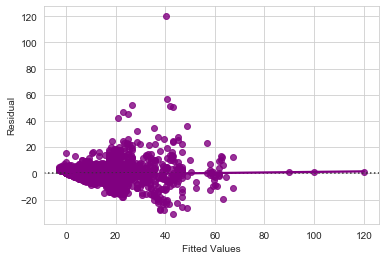

In [103]:
sns.set_style('whitegrid')
sns.residplot(fitted,residual,color='purple',lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

plt.show()

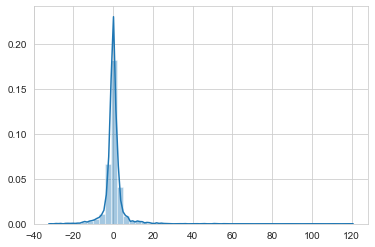

In [104]:
## 5. Test for normality
## Errors should be normally distributed.
sns.distplot(residual)

plt.show()

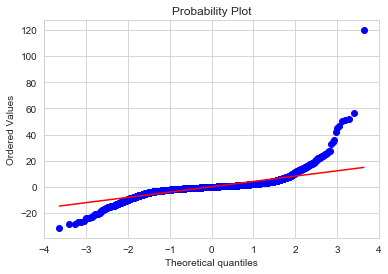

In [105]:
## QQ plot for residuals can be used to visually check the normality assumption
import pylab
import scipy.stats as stats
stats.probplot(residual,dist='norm',plot=pylab)
plt.show()

In [106]:
stats.jarque_bera(residual)

(1580930.9366130612, 0.0)

**All assumptions of linear regression are checked and are fulfilled**

### Now lets check performnce of model

In [107]:
x_test_final=x_test[x_train2_aux.columns]

In [108]:
x_test_final.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Kochi,Owner_Type_Second,Owner_Type_Third,Model_3,Model_5,Model_6,...,Model_XJ,Model_XUV500,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zest,Model_i10,Model_i20
2954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6520,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6036,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y_pred=olsres1.predict(x_test_final)

In [110]:
y_pred = olsres1.predict(x_test_final)

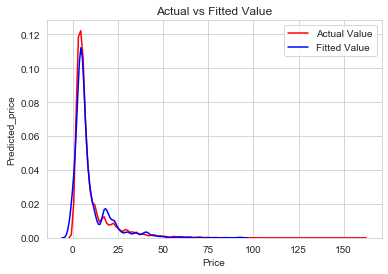

In [111]:
# Distribution plot to compare actual Price vs predicted Price
ax1=sns.distplot(df1['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('Price')
plt.ylabel('Predicted_price')
plt.show()

In [112]:
#checking RMSE on both train and test set
#difference should be less between both

from sklearn.metrics import mean_squared_error
rms=np.sqrt(mean_squared_error(y_train,fitted))
print('Train error:',rms)

rms1=np.sqrt(mean_squared_error(y_test,y_pred))
print('Test error:',rms1)

Train error: 4.960322823328436
Test error: 5.157013404235154


In [113]:
# R2 Squared on train and test data
print('R2 score on train:',r2_score(y_train,fitted))
print('R2 score on test:',r2_score(y_test,y_pred))

R2 score on train: 0.795130979715412
R2 score on test: 0.7467317066685539


* 1. The model indicates that the most significant predictors of price of used cars are - 
    - Age of the car
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - OwnerType
    - Transmission - Automatic/Manual
        
* 2. Newer cars sell for higher prices. 1 unit increase in age  of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.


* 3. As the number of seats increases, the price of the car increases - exp(0.05) = 1.05 Lakhs
    
* 4. Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.
    
* 5. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.
    
* 6. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.